## Acelerador

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import scipy.signal
from scipy.optimize import curve_fit
import scipy.stats as stats
import pandas as pd
import os
from  scipy.stats import chi2_contingency
#from statsmodels.stats.weightstats import DescrStatsW
import glob
import csv
import fileinput
from glob import glob
import re
from scipy.signal import butter, filtfilt
import scipy.integrate as spi
from scipy.stats import chi2
from scipy.signal import find_peaks



#ej de path=r'C:\Users\Sergio\Desktop\L6y7\18-04-23'
#path='C:/Users/Nicolás Molina/Desktop/L6-7/04-05-23-14kV'
#path=r'C:\Users\Sergio\Desktop\L6y7\04-05-23-19kV'

path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR'

#get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('matplotlib', 'qt5')

import matplotlib.ticker as ticker


In [2]:
path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\separo por tipo\Al10um (aprox 10 pA)'
plt.close("all")
os.chdir (path)
import glob

plt.figure(figsize=(10, 6))

# Recorre todos los archivos .txt en el directorio
for archivo in glob.glob(os.path.join(path, "*.txt")):
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Calcula Imax - Imin
    Imax = np.max(corriente)
    Imin = np.min(corriente)
    diferencia = Imax - Imin

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=nombre_archivo)

    # Agrega el texto de la diferencia en el gráfico
    plt.annotate("$I_{max}-I_{min}=$" f"{diferencia:.4f}", 
                 xy=(tiempo[np.argmax(corriente)], Imax),  # Coordenadas cerca del máximo
                 xytext=(tiempo[np.argmax(corriente)] + 50, Imax),  # Ajusta la posición del texto
                 fontsize=12, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura etiquetas, leyenda y título

# Configura etiquetas, leyenda y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.title("protones 10mev aprox 10pA (100pA con lamina de Al de 10um)")
plt.legend()
plt.grid(True)
plt.show()




# Define el directorio de trabajo
path = r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\separo por tipo\100 pA buenas'
os.chdir(path)

# Inicializa la figura
plt.figure(figsize=(10, 6))

# Recorre todos los archivos .txt en el directorio
for archivo in glob.glob(os.path.join(path, "*.txt")):
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Calcula Imax - Imin
    Imax = np.max(corriente)
    Imin = np.min(corriente)
    diferencia = Imax - Imin

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=nombre_archivo)

    # Agrega el texto de la diferencia en el gráfico
    plt.annotate("$I_{max}-I_{min}=$" f"{diferencia:.4f}", 
                 xy=(tiempo[np.argmax(corriente)], Imax),  # Coordenadas cerca del máximo
                 xytext=(tiempo[np.argmax(corriente)] + 50, Imax),  # Ajusta la posición del texto
                 fontsize=12, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura etiquetas, leyenda y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.title("Irradiación con $H^+$ de 10 MeV y 100 pA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\separo por tipo\1nA'

os.chdir (path)
import glob

plt.figure(figsize=(10, 6))

for archivo in glob.glob(os.path.join(path, "*.txt")):
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Calcula Imax - Imin
    Imax = np.max(corriente)
    Imin = np.min(corriente)
    diferencia = Imax - Imin

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=nombre_archivo)

    # Agrega el texto de la diferencia en el gráfico
    plt.annotate("$I_{max}-I_{min}=$" f"{diferencia:.4f}", 
                 xy=(tiempo[np.argmax(corriente)], Imax),  # Coordenadas cerca del máximo
                 xytext=(tiempo[np.argmax(corriente)] + 50, Imax),  # Ajusta la posición del texto
                 fontsize=12, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura etiquetas, leyenda y título

# Configura etiquetas, leyenda y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.title("protones 1nA")
plt.legend()
plt.grid(True)
plt.show()


path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\separo por tipo\carbono y destruccion'

os.chdir (path)
import glob

plt.figure(figsize=(10, 6))

for archivo in glob.glob(os.path.join(path, "*.txt")):
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Calcula Imax - Imin
    Imax = np.max(corriente)
    Imin = np.min(corriente)
    diferencia = Imax - Imin

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=nombre_archivo)

    # Agrega el texto de la diferencia en el gráfico
    plt.annotate("$I_{max}-I_{min}=$" f"{diferencia:.4f}", 
                 xy=(tiempo[np.argmax(corriente)], Imax),  # Coordenadas cerca del máximo
                 xytext=(tiempo[np.argmax(corriente)] + 50, Imax),  # Ajusta la posición del texto
                 fontsize=12, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura etiquetas, leyenda y título

# Configura etiquetas, leyenda y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Aumento en corriente (u.a)")
plt.title("carbono y destruccion")
plt.legend()
plt.grid(True)
plt.show()


path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\separo por tipo\para sacar dudas'

os.chdir (path)
import glob

plt.figure(figsize=(10, 6))

# Recorre todos los archivos .txt en el directorio
for archivo in glob.glob(os.path.join(path, "*.txt")):
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo,skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]
    corriente=corriente#/min(corriente[:50])

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=nombre_archivo)

# Configura etiquetas, leyenda y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente")
plt.title("sacando dudas")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


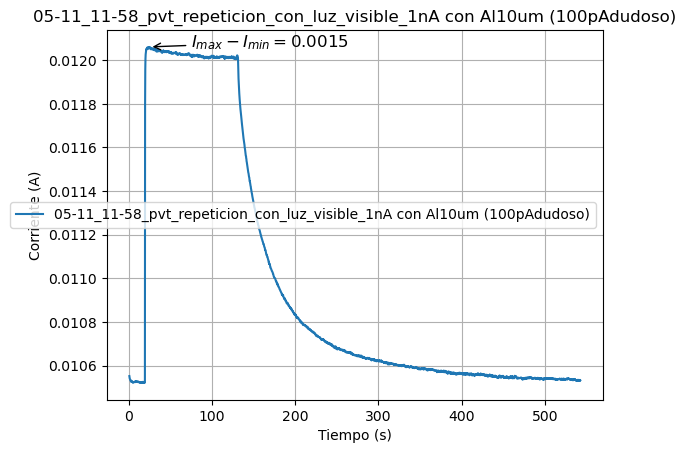

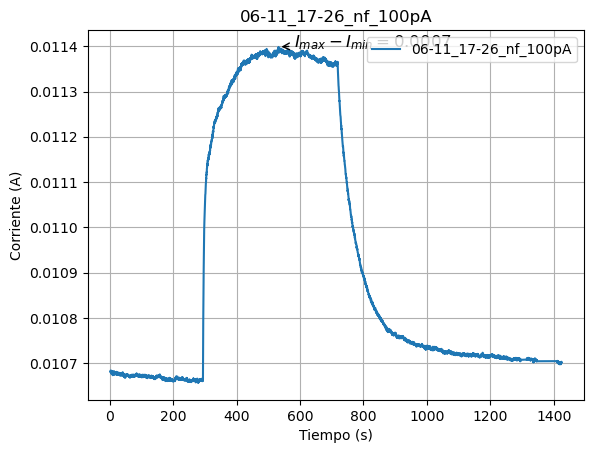

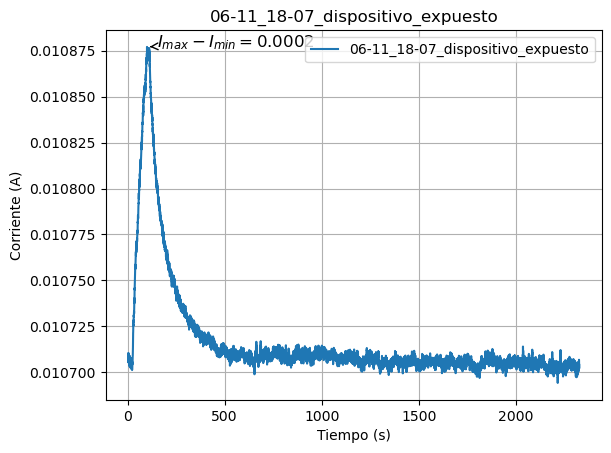

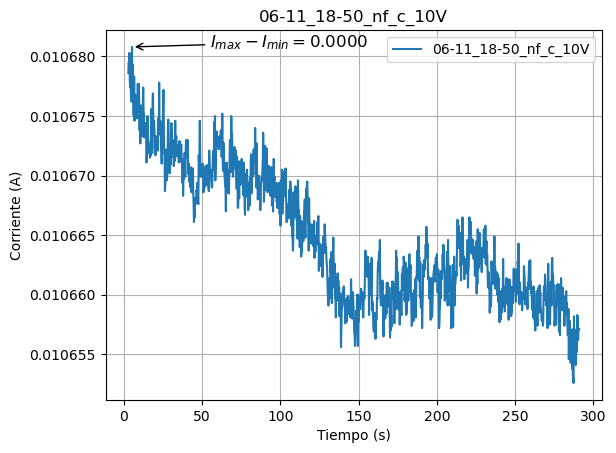

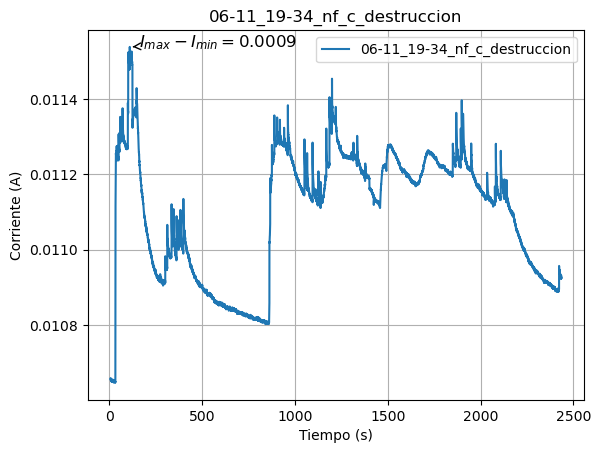

In [3]:
path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR CHECK'
plt.close("all")
os.chdir (path)
import glob

get_ipython().run_line_magic('matplotlib', 'inline')




# Recorre todos los archivos .txt en el directorio
for archivo in glob.glob(os.path.join(path, "*.txt")):
    plt.figure()
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Calcula Imax - Imin
    Imax = np.max(corriente)
    Imin = np.min(corriente)
    diferencia = Imax - Imin

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=nombre_archivo)

    # Agrega el texto de la diferencia en el gráfico
    plt.annotate("$I_{max}-I_{min}=$" f"{diferencia:.4f}", 
                 xy=(tiempo[np.argmax(corriente)], Imax),  # Coordenadas cerca del máximo
                 xytext=(tiempo[np.argmax(corriente)] + 50, Imax),  # Ajusta la posición del texto
                 fontsize=12, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Corriente (A)")
    plt.title(nombre_archivo)
    plt.legend()
    plt.grid(True)
    plt.show()
get_ipython().run_line_magic('matplotlib', 'qt5')


# EL BUEN CODIGO


In [ ]:

# Configuración inicial
path = r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR CHECK\PROMETEDORAS'
plt.close("all")
os.chdir(path)
import glob

get_ipython().run_line_magic('matplotlib', 'qt5')

plt.figure()

titulos=["PVT","Ps/Nf 10%","Ps"]
# Recorre todos los archivos .txt en el directorio
j=0
for archivo in glob.glob(os.path.join(path, "*.txt")):
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Encuentra los máximos locales (niveles altos del pulso)
    maximos, _ = find_peaks(corriente, height=np.mean(corriente), distance=len(corriente)//10)
    # Encuentra los mínimos locales (niveles bajos del pulso)
    minimos, _ = find_peaks(-corriente, height=-np.mean(corriente), distance=len(corriente)//10)

    # Calcula el promedio de los máximos y mínimos locales
    promedio_maximos = np.mean(corriente[maximos]) if len(maximos) > 0 else np.mean(corriente)
    promedio_minimos = np.mean(corriente[minimos]) if len(minimos) > 0 else np.mean(corriente)

    # Calcula la diferencia promedio entre máximos y mínimos
    diferencia_promedio = promedio_maximos - promedio_minimos

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente, label=titulos[j])

    # Agrega el texto de la diferencia promedio en el gráfico
    plt.annotate("$\\overline{I_{max}}-\\overline{I_{min}}=$" f"{diferencia_promedio:.4f}", 
                xy=(tiempo[np.argmax(corriente)], np.max(corriente)),  # Coordenadas cerca del máximo
                xytext=(tiempo[np.argmax(corriente)] + 200, np.max(corriente)),  # Ajusta la posición del texto
                fontsize=12, color='black',
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    j=j+1

# Configuración del gráfico
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.title("Irradiaciones con 100 pA de $H^+$ de 10 MeV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR CHECK\CONTINUIDAD DE PICOS'

os.chdir (path)
import glob

get_ipython().run_line_magic('matplotlib', 'qt5')




# Recorre todos los archivos .txt en el directorio

for archivo in glob.glob(os.path.join(path, "*.txt")):
    plt.figure()
    # Extrae el nombre del archivo sin la extensión para usarlo como etiqueta
    nombre_archivo = os.path.basename(archivo).replace('.txt', '')

    # Carga los datos del archivo asumiendo dos columnas: tiempo y corriente
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    # Calcula Imax - Imin
    Imax = np.max(corriente)
    Imin = np.min(corriente)
    diferencia = Imax - Imin

    # Grafica cada archivo con su etiqueta
    plt.plot(tiempo, corriente)
    
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Fotocorriente (A)")
    plt.title("Irradiación a PVT con 1nA de $H^+$ de 10 MeV")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # Agrega el texto de la diferencia en el gráfico
    """
    plt.annotate("$I_{max}-I_{min}=$" f"{diferencia:.4f}", 
                xy=(tiempo[np.argmax(corriente)], Imax),  # Coordenadas cerca del máximo
                xytext=(tiempo[np.argmax(corriente)] + 100, Imax),  # Ajusta la posición del texto
                fontsize=12, color='black',
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    """



path = r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR CHECK\SATURADAS'
os.chdir(path)

plt.figure()

titulos = ["PVT/$CeF_3$ 10%", "Ps/Nf 10%", "Ps", "PVT"]
desplazamiento_texto = [200, 250, 300, 350]  # Valores diferentes para separar los textos
j = 0

for archivo in glob.glob(os.path.join(path, "*.txt")):
    datos = np.loadtxt(archivo, skiprows=1)
    tiempo = datos[:, 0]
    corriente = datos[:, 1]

    maximos, _ = find_peaks(corriente, height=np.mean(corriente), distance=len(corriente)//10)
    minimos, _ = find_peaks(-corriente, height=-np.mean(corriente), distance=len(corriente)//10)

    promedio_maximos = np.mean(corriente[maximos]) if len(maximos) > 0 else np.mean(corriente)
    promedio_minimos = np.mean(corriente[minimos]) if len(minimos) > 0 else np.mean(corriente)
    diferencia_promedio = promedio_maximos - promedio_minimos

    plt.plot(tiempo, corriente, label=titulos[j])

    # Ajuste de posición del texto
    x_text = tiempo[np.argmax(corriente)] + desplazamiento_texto[j]
    y_text = np.max(corriente) - 0.0001 * j**2  # Desplazar verticalmente

    plt.annotate(
        "$\\overline{I_{max}}-\\overline{I_{min}}=$" f"{diferencia_promedio:.4f}",
        xy=(tiempo[np.argmax(corriente)], np.max(corriente)),
        xytext=(x_text, y_text),
        fontsize=12,
        color='black',
        #bbox=dict(boxstyle="round,pad=0.0", edgecolor="black", facecolor="white"),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        rotation=0  # Rotar ligeramente para mejorar la legibilidad
    )
    j += 1

plt.xlabel("Tiempo (s)")
plt.ylabel("Fotocorriente (A)")
plt.title("Irradiaciones con 1 nA de $H^+$ de 10 MeV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# SRIM


In [5]:
path = r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\simulacion trim gan expuesto'
os.chdir(path)

plt.close("all")
distancia,numeroiones,a=np.loadtxt("POLIESTIRENO PROT 10 MEV.txt",delimiter=",",skiprows=4,unpack=True)

distancia=distancia*10**(-7)

plt.figure()
plt.step(distancia,numeroiones,label="Ps")
plt.xlabel("Profundidad (mm)")
plt.ylabel(f"Cantidad de $H^+$ depositados/$cm^2$")
#plt.axvline(10.022)
#plt.title("Depósito de  $H^+$ de 10 MeV en centelladores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


distancia,numeroiones,a=np.loadtxt("pvt PROT 10 MEV.txt",delimiter=",",skiprows=4,unpack=True)

distancia=distancia*10**(-7)

plt.step(distancia,numeroiones,label="PVT")
plt.xlabel("Profundidad (mm)")
plt.ylabel(f"Cantidad de $H^+$ depositados/$cm^2$")
#plt.axvline(10.022)




distancia,numeroiones,a=np.loadtxt("pvt cef3 PROT 10 MEV.txt",delimiter=",",skiprows=4,unpack=True)

distancia=distancia*10**(-7)


plt.step(distancia,numeroiones,label="PVT/$CeF_3$ 10%")

#plt.axvline(10.022)


distancia,numeroiones,a=np.loadtxt("psnf PROT 10 MEV.txt",delimiter=",",skiprows=4,unpack=True)

distancia=distancia*10**(-7)


plt.step(distancia,numeroiones,label="Ps/Nf 10%")

#plt.axvline(10.022)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
path = r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\ACELERADOR\simulacion trim gan expuesto'
os.chdir(path)
# Cargar datos desde el archivo binario
data = np.fromfile("IONIZ.SAV", dtype=np.float32)

# SRIM almacena datos en pares: (Profundidad, Energía depositada)
depth = data[0::2]  # Cada dos valores, empezando en el primero
energy_loss = data[1::2]  # Cada dos valores, empezando en el segundo

# Graficar la energía depositada a lo largo de la profundidad
plt.plot(depth, energy_loss, label="Energía depositada por ionización")
plt.xlabel("Profundidad (nm)")
plt.ylabel("Energía depositada (keV/nm)")
plt.title("Distribución de energía de protones en el material")
plt.legend()
plt.grid()
plt.show()
